<a href="https://colab.research.google.com/github/Shreyabansal3112/image-basics/blob/main/exp_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv 
import matplotlib.pyplot as plt

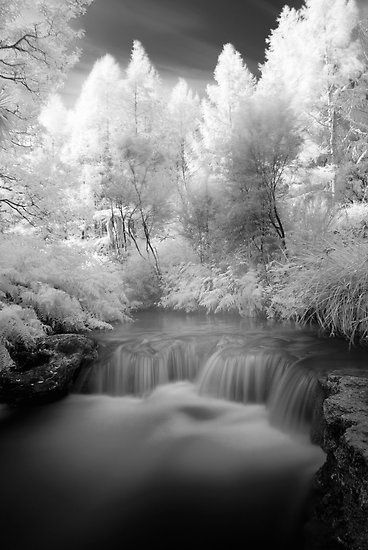

(550, 368)

In [ ]:
img = cv.imread('p2.jpg', cv.IMREAD_GRAYSCALE)
from google.colab.patches import cv2_imshow
cv2_imshow(img)
img.shape

In [ ]:
def highPassFiltering(img,size):#Transfer parameters are Fourier transform spectrogram and filter size
    h, w = img.shape[0:2]#Getting image properties
    h1,w1 = int(h/2), int(w/2)#Find the center point of the Fourier spectrum
    img[h1-int(size/2):h1+int(size/2), w1-int(size/2):w1+int(size/2)] = 0#Center point plus or minus half of the filter size, forming a filter size that defines the size, then set to 0
    return img

In [ ]:
img_dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(img_dft)  # Move frequency domain from upper left to middle



In [ ]:
#High pass filter
dft_shift=highPassFiltering(dft_shift,60)
res = np.log(np.abs(dft_shift))




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


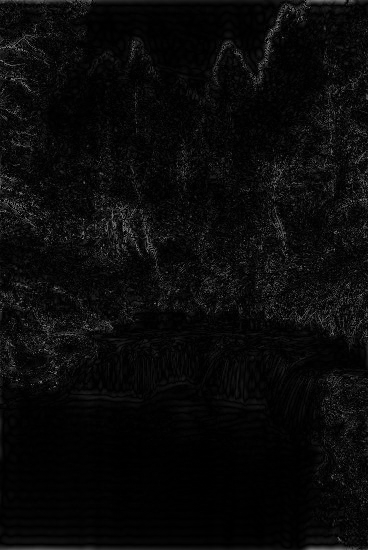

In [ ]:
# Inverse Fourier Transform
idft_shift = np.fft.ifftshift(dft_shift)  #Move the frequency domain from the middle to the upper left corner
ifimg = np.fft.ifft2(idft_shift)  # Fourier library function call
ifimg = np.abs(ifimg)
cv2_imshow(np.int8(ifimg))


In [ ]:
def lowPassFiltering(img,size):#Transfer parameters are Fourier transform spectrogram and filter size
    h, w = img.shape[0:2]#Getting image properties
    h1,w1 = int(h/2), int(w/2)#Find the center point of the Fourier spectrum
    img2 = np.zeros((h, w), np.uint8)#Define a blank black image with the same size as the Fourier Transform Transfer
    img2[h1-int(size/2):h1+int(size/2), w1-int(size/2):w1+int(size/2)] = 1#Center point plus or minus half of the filter size, forming a filter size that defines the size, then set to 1, preserving the low frequency part
    img3=img2*img #A low-pass filter is obtained by multiplying the defined low-pass filter with the incoming Fourier spectrogram one-to-one.
    return img3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


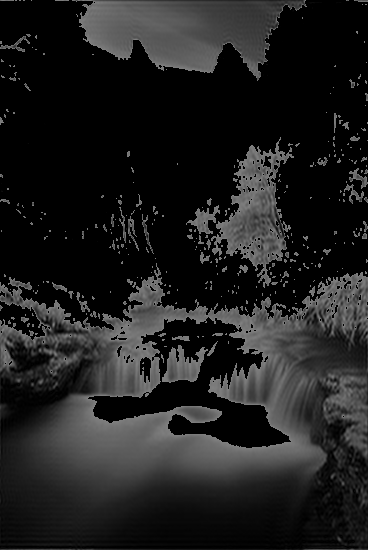

In [ ]:
img_dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(img_dft)  # Move frequency domain from upper left to middle

# Low-pass filter
dft_shift = lowPassFiltering(dft_shift, 200)
res = np.log(np.abs(dft_shift))

# Inverse Fourier Transform
idft_shift = np.fft.ifftshift(dft_shift)  # Move the frequency domain from the middle to the upper left corner
ifimg = np.fft.ifft2(idft_shift)  # Fourier library function call
ifimg = np.abs(ifimg)
cv2_imshow(np.int8(ifimg))